# Unit 5 - Financial Planning


In [98]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot
%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv("keys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_BTC = 1.2
my_ETH = 5.3

In [5]:
# Crypto API URLs
BTC_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
ETH_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
BTC_data = requests.get(BTC_url).json()
ETH_data = requests.get(ETH_url).json()
# Fetch current ETH price
current_BTC = BTC_data["data"]["1"]["quotes"]["USD"]["price"]
current_BTC
current_ETH = ETH_data["data"]["1027"]["quotes"]["USD"]["price"]
current_ETH
# Compute current value of my crpto
my_BTC_value = my_BTC * current_BTC
my_ETH_value = my_ETH * current_ETH
# Print current crypto wallet balance
print(f"The current value of your {my_BTC} BTC is ${my_BTC_value:0.2f}")
print(f"The current value of your {my_ETH} ETH is ${my_ETH_value:0.2f}")

The current value of your 1.2 BTC is $63063.60
The current value of your 5.3 ETH is $13280.10


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_AGG = 200
my_SPY = 50



In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key)

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2021-04-22", tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
data = alpaca.get_barset(tickers , timeframe, start = today, end = today).df
# Preview DataFrame


In [10]:
# Pick AGG and SPY close prices
current_AGG = data["AGG"]["close"].iloc[0]
current_SPY = data["SPY"]["close"].iloc[0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${current_AGG}")
print(f"Current SPY closing price: ${current_SPY}")

Current AGG closing price: $114.77
Current SPY closing price: $412.3


In [11]:
# Compute the current value of shares
my_AGG_value = my_AGG * current_AGG
my_SPY_value = my_SPY * current_SPY

# Print current value of share
print(f"The current value of your {my_SPY} SPY shares is ${my_SPY_value:0.2f}")
print(f"The current value of your {my_AGG} AGG shares is ${my_AGG_value:0.2f}")

The current value of your 50 SPY shares is $20615.00
The current value of your 200 AGG shares is $22954.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000
# Create savings DataFrame
df_savings = pd.DataFrame([my_SPY_value+my_AGG_value, my_BTC_value+my_ETH_value],index = ["Stocks", "Crypto"], columns = ["Amount"])

# Display savings DataFrame
display(df_savings)

,Amount
Stocks,43569.000
Crypto,76343.704


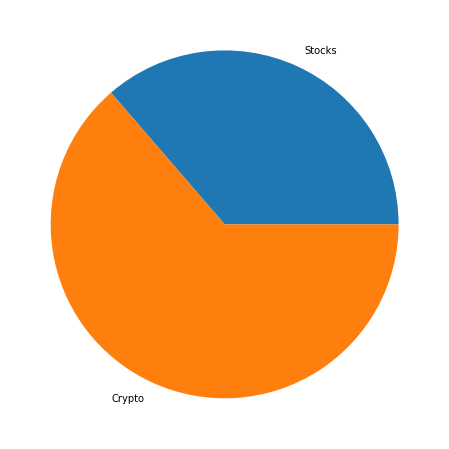

In [13]:
# Plot savings pie chart
fig = matplotlib.pyplot.figure(figsize = (8,8))
pie = matplotlib.pyplot.pie(df_savings["Amount"], labels = df_savings.index)

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings.sum().sum()
savings
# Validate saving health

if(savings > emergency_fund):
    print("Congrats! You are doing a great job of saving!")
elif(savings == emergency_fund):
    print("Congrats! You have reached the savings thershold!")
elif(savings < emergency_fund):
    print(f"Oh no - you are ${emergency_fund - savings} away from yoru goal")

Congrats! You are doing a great job of saving!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-20', tz='America/New_York').isoformat()

In [58]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(tickers , timeframe, start = start_date, end = end_date, limit=1000).df

# Display sample data
df_stock_data

AGG                                       \
                             open      high      low    close   volume   
time                                                                     
2017-05-01 00:00:00-04:00  108.86  108.9599  108.620  108.735  2335646   
2017-05-02 00:00:00-04:00  108.68  108.9400  108.679  108.890  2570794   
2017-05-03 00:00:00-04:00  108.97  108.9900  108.770  108.795  1765578   
2017-05-04 00:00:00-04:00  108.55  108.7000  108.550  108.665  1789624   
2017-05-05 00:00:00-04:00  108.72  108.7400  108.570  108.720  1287794   
...                           ...       ...      ...      ...      ...   
2021-04-14 00:00:00-04:00  114.41  114.4400  114.280  114.380  3519430   
2021-04-15 00:00:00-04:00  113.78  114.9800  113.780  114.810  5455777   
2021-04-16 00:00:00-04:00  114.56  114.6650  114.500  114.540  3488514   
2021-04-19 00:00:00-04:00  114.00  114.5000  114.000  114.440  4820664   
2021-04-20 00:00:00-04:00  114.42  114.6700  114.390  114.620  3674209   

                              SPY                                       
                             open      high      low   close    volume  
time                                                                    
2017-05-01 00:00:00-04:00  238.69  239.1700  238.195  238.65  38750688  
2017-05-02 00:00:00-04:00  238.84  238.9800  238.300  238.79  39563850  
2017-05-03 00:00:00-04:00  238.32  238.8775  237.700  238.52  47292627  
2017-05-04 00:00:00-04:00  238.83  238.9225  237.780  238.75  46170233  
2017-05-05 00:00:00-04:00  239.18  239.7200  238.680  239.72  43733544  
...                           ...       ...      ...     ...       ...  
2021-04-14 00:00:00-04:00  412.83  413.9600  410.870  411.48  52954751  
2021-04-15 00:00:00-04:00  413.74  416.1600  413.690  415.82  54836749  
2021-04-16 00:00:00-04:00  417.25  417.9100  415.730  417.31  66624780  
2021-04-19 00:00:00-04:00  416.26  416.7400  413.790  415.24  66226327  
2021-04-20 00:00:00-04:00  413.91  415.0859  410.590  412.22  69715050  

[1000 rows x 10 columns]

In [69]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [70]:
# Printing the simulation input data
MC.portfolio_data

AGG                                       \
                             open      high      low    close   volume   
time                                                                     
2017-05-01 00:00:00-04:00  108.86  108.9599  108.620  108.735  2335646   
2017-05-02 00:00:00-04:00  108.68  108.9400  108.679  108.890  2570794   
2017-05-03 00:00:00-04:00  108.97  108.9900  108.770  108.795  1765578   
2017-05-04 00:00:00-04:00  108.55  108.7000  108.550  108.665  1789624   
2017-05-05 00:00:00-04:00  108.72  108.7400  108.570  108.720  1287794   
...                           ...       ...      ...      ...      ...   
2021-04-14 00:00:00-04:00  114.41  114.4400  114.280  114.380  3519430   
2021-04-15 00:00:00-04:00  113.78  114.9800  113.780  114.810  5455777   
2021-04-16 00:00:00-04:00  114.56  114.6650  114.500  114.540  3488514   
2021-04-19 00:00:00-04:00  114.00  114.5000  114.000  114.440  4820664   
2021-04-20 00:00:00-04:00  114.42  114.6700  114.390  114.620  3674209   

                                           SPY                             \
                          daily_return    open      high      low   close   
time                                                                        
2017-05-01 00:00:00-04:00          NaN  238.69  239.1700  238.195  238.65   
2017-05-02 00:00:00-04:00     0.001425  238.84  238.9800  238.300  238.79   
2017-05-03 00:00:00-04:00    -0.000872  238.32  238.8775  237.700  238.52   
2017-05-04 00:00:00-04:00    -0.001195  238.83  238.9225  237.780  238.75   
2017-05-05 00:00:00-04:00     0.000506  239.18  239.7200  238.680  239.72   
...                                ...     ...       ...      ...     ...   
2021-04-14 00:00:00-04:00    -0.000699  412.83  413.9600  410.870  411.48   
2021-04-15 00:00:00-04:00     0.003759  413.74  416.1600  413.690  415.82   
2021-04-16 00:00:00-04:00    -0.002352  417.25  417.9100  415.730  417.31   
2021-04-19 00:00:00-04:00    -0.000873  416.26  416.7400  413.790  415.24   
2021-04-20 00:00:00-04:00     0.001573  413.91  415.0859  410.590  412.22   

                                                  
                             volume daily_return  
time                                              
2017-05-01 00:00:00-04:00  38750688          NaN  
2017-05-02 00:00:00-04:00  39563850     0.000587  
2017-05-03 00:00:00-04:00  47292627    -0.001131  
2017-05-04 00:00:00-04:00  46170233     0.000964  
2017-05-05 00:00:00-04:00  43733544     0.004063  
...                             ...          ...  
2021-04-14 00:00:00-04:00  52954751    -0.003246  
2021-04-15 00:00:00-04:00  54836749     0.010547  
2021-04-16 00:00:00-04:00  66624780     0.003583  
2021-04-19 00:00:00-04:00  66226327    -0.004960  
2021-04-20 00:00:00-04:00  69715050    -0.007273  

[1000 rows x 12 columns]

In [71]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005432,0.997667,1.004410,0.994597,1.004164,1.007296,1.002851,1.011576,1.003890,1.001260,...,1.002126,0.994250,1.016863,1.006241,1.007554,0.990348,1.000961,1.002425,0.994940,1.010658
2,1.018173,1.008670,1.006412,0.999125,1.012176,1.000970,0.993694,1.017778,1.013142,0.996532,...,0.988682,1.006796,1.003021,1.009912,1.007480,0.993905,0.999397,1.003699,1.002604,1.009512
3,1.015572,0.999316,0.988303,0.997226,0.999516,1.005306,0.985396,1.021853,1.026304,0.990240,...,0.989767,0.995745,1.009626,1.022521,1.022497,0.999371,1.003692,1.001537,1.000734,0.987454
4,1.021298,0.990503,0.986403,0.982011,0.997991,1.015850,0.985934,1.015464,1.035075,0.991367,...,0.984550,0.982483,1.015756,1.028928,1.014029,0.994201,0.995287,1.006635,1.000994,0.988700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.660067,14.590577,11.190436,19.450275,14.840716,69.830827,24.048696,12.908787,25.427817,13.927938,...,26.098335,11.096538,31.572158,7.683438,10.092484,22.380959,21.471065,32.328920,8.757852,3.137199
7557,9.563266,14.652454,11.275201,19.484905,14.931914,70.089187,23.771066,13.010632,25.196010,13.942932,...,26.158701,10.939137,31.647225,7.690594,10.088155,22.439336,21.580691,32.567412,8.834274,3.142695
7558,9.443859,14.785952,11.412748,19.620369,15.010680,70.025981,23.942512,12.881767,25.494414,14.078404,...,25.951358,10.869377,31.672304,7.718377,9.994735,22.746877,21.398788,32.414465,8.843203,3.202457
7559,9.495534,14.798437,11.254762,19.545984,15.061439,69.123490,23.892092,12.831203,25.057629,14.207462,...,25.845474,11.032874,31.584215,7.794377,9.944717,22.779746,20.988443,32.467981,8.852010,3.212840


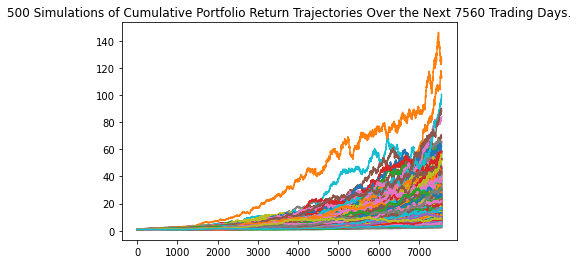

In [72]:
# Plot simulation outcomes
line_plot = MC.plot_simulation()

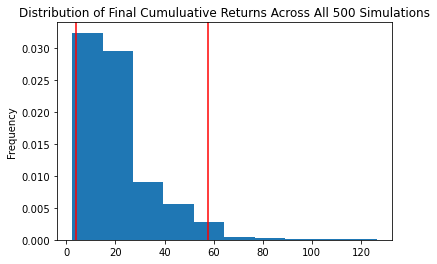

In [99]:
# Plot probability distribution and confidence intervals
dist_plot = MC.plot_distribution()

### Retirement Analysis

In [77]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean             21.254227
std              15.515407
min               2.387015
25%              10.638328
50%              17.586690
75%              26.299198
max             126.304540
95% CI Lower      4.024332
95% CI Upper     57.868144
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [78]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = tbl[8]*initial_investment
ci_upper = tbl[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $80486.63981360047 and $1157362.8791220773


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [79]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = tbl[8]*initial_investment
ci_upper = tbl[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $120729.9597204007 and $1736044.318683116


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [80]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [81]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996425,1.016495,1.002664,0.997416,0.996520,0.988726,0.994330,1.003819,0.997382,1.003091,...,1.011235,1.002650,1.009752,1.009883,0.990777,1.018577,1.000730,1.003283,1.004267,1.001442
2,0.995932,1.012051,1.005274,0.987291,0.996127,0.990380,0.993002,1.008766,1.002663,1.002277,...,1.027247,0.999836,1.011386,0.993281,0.989940,1.025089,0.996174,1.004775,1.005296,1.006470
3,0.999821,1.011288,1.014976,0.989323,1.001789,0.984662,1.000101,1.007151,1.000229,1.000214,...,1.020999,0.995009,1.006991,0.989014,0.977033,1.030305,1.008625,0.995407,1.018502,1.003581
4,1.006707,1.016311,1.009670,0.987847,0.991168,0.981124,1.004359,1.000429,0.996936,0.999086,...,1.019356,0.983634,1.012586,0.980302,0.987669,1.021434,1.013281,0.989830,1.006861,1.018609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.306095,1.651098,1.519121,1.673312,1.469719,1.078551,1.570229,1.432626,1.296616,1.149575,...,1.695473,1.341284,1.715580,1.264916,1.156133,1.609798,1.524766,1.651829,1.617388,2.325380
1257,1.308247,1.657933,1.510488,1.695739,1.467461,1.079858,1.582231,1.438638,1.301432,1.146587,...,1.692700,1.348218,1.705617,1.262432,1.140229,1.608242,1.547670,1.642998,1.603676,2.301084
1258,1.325419,1.652688,1.510903,1.666798,1.460911,1.073082,1.592917,1.466671,1.275155,1.155058,...,1.692354,1.363004,1.699639,1.269834,1.132403,1.605521,1.568375,1.632691,1.624401,2.299799
1259,1.330397,1.657615,1.490173,1.632798,1.445149,1.071831,1.627943,1.461079,1.294337,1.151925,...,1.710847,1.356938,1.683415,1.278426,1.144917,1.610881,1.586005,1.644239,1.623299,2.289398


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

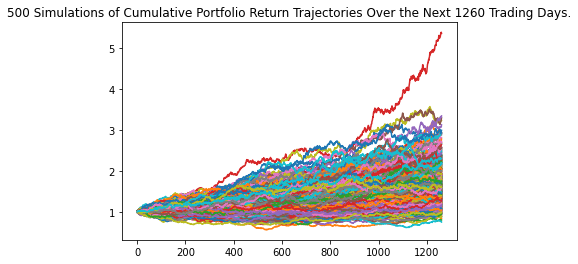

In [82]:
# Plot simulation outcomes
MC_five_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

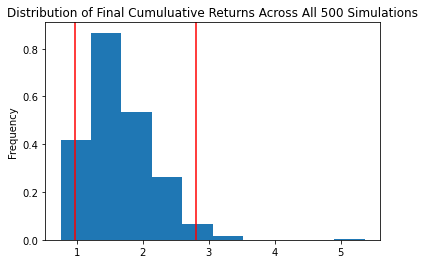

In [83]:
# Plot probability distribution and confidence intervals
MC_five_year.plot_distribution()

In [84]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five_year = MC_five_year.summarize_cumulative_return()

# Print summary statistics
tbl_five_year

count           500.000000
mean              1.646611
std               0.495796
min               0.751472
25%               1.288064
50%               1.582394
75%               1.875444
max               5.366146
95% CI Lower      0.965744
95% CI Upper      2.798584
Name: 1260, dtype: float64

In [85]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = tbl_five_year[8]*initial_investment
ci_upper_five = tbl_five_year[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57944.627832317885 and $167915.04097592633


### Ten Years Retirement Option

In [86]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [87]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999016,1.002642,0.994074,0.995573,1.000133,1.003122,0.998541,0.994099,1.002683,0.997452,...,1.000800,1.010002,0.994134,1.010684,1.005451,0.990692,1.000439,1.001161,1.013650,0.995819
2,0.991263,1.002126,1.005009,0.993953,1.012670,0.998601,0.993650,0.994416,1.010393,1.006219,...,1.006721,1.011375,0.994277,1.004331,1.004443,0.976184,0.993777,0.996877,1.008618,0.997506
3,0.988445,0.991726,0.982516,1.015082,1.011581,0.988988,0.992109,1.004150,1.004341,1.005806,...,1.015090,1.019728,0.995429,1.011797,0.983284,0.978736,0.987274,1.006415,1.012636,1.003250
4,0.991822,0.995111,0.983736,1.013311,1.011596,0.989415,0.986960,1.013655,1.001026,1.007449,...,1.022052,1.019446,0.989990,1.018185,0.983833,0.978061,0.994185,1.006966,1.018760,0.994917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.344528,2.359823,2.165439,1.735609,3.381715,2.804706,3.051796,4.241124,1.222857,2.977462,...,1.466769,2.318036,1.545686,3.272499,4.245158,5.065669,1.405908,1.384231,2.184683,3.866341
2517,4.338632,2.345949,2.174462,1.751116,3.398380,2.774311,3.047689,4.197988,1.235052,2.998616,...,1.456104,2.320479,1.548141,3.298563,4.240914,5.064483,1.421700,1.389769,2.226092,3.876556
2518,4.294595,2.376299,2.192009,1.734367,3.361801,2.794385,3.029162,4.220247,1.233555,3.059076,...,1.462499,2.291579,1.546295,3.310107,4.245454,5.053472,1.412922,1.390389,2.216038,3.863303
2519,4.294986,2.386340,2.210165,1.718746,3.376597,2.804143,3.061143,4.217715,1.242412,3.071416,...,1.459587,2.283665,1.546026,3.303139,4.229689,5.006130,1.426927,1.414856,2.221040,3.876854


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

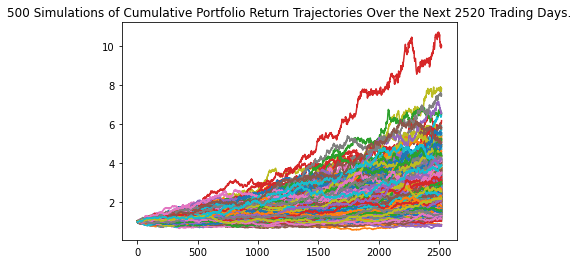

In [88]:
# Plot simulation outcomes
MC_ten_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

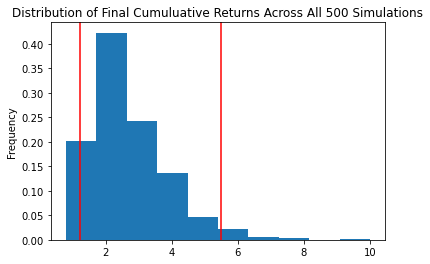

In [89]:
# Plot probability distribution and confidence intervals
MC_ten_year.plot_distribution()

In [93]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten_year = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
tbl_ten_year

count           500.000000
mean              2.711920
std               1.178928
min               0.787630
25%               1.869959
50%               2.427966
75%               3.280813
max              10.010567
95% CI Lower      1.204232
95% CI Upper      5.491752
Name: 2520, dtype: float64

In [94]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = tbl_ten_year[8]*initial_investment
ci_upper_ten = tbl_ten_year[9]*initial_investment
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $72253.89306049285 and $329505.1326702762
